In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [3]:
# Charger le fichier CSV
df = pd.read_csv("netflix_titles.csv")


Prétraitement des données

In [6]:
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

In [8]:
# Supprimer les lignes avec des valeurs manquantes
df 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [10]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,4808,4808,4808,4808,4808,4808,4808,4808.000000,4808,4808,4808,4808
unique,4808,2,4808,3613,4688,544,1291,NaN,14,195,323,4803
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,TV-MA,93 min,"Dramas, International Movies",A scheming matriarch plots to cut off her disa...
freq,1,4673,1,18,10,1653,100,NaN,1665,121,306,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.710275,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.521541,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [12]:
def extract_duration(duration):
    try:
        return float(duration.split(' ')[0])  # Extraire la partie numérique avant l'espace
    except (ValueError, IndexError):  # Capturer les exceptions spécifiques
        return None  # Retourner None si la conversion échoue

# Exemple d'utilisation
# Affiche None


In [14]:
# Appliquer la fonction sur la colonne 'duration' pour extraire les valeurs numériques
df['duration_normalise'] = df['duration'].apply(lambda x: extract_duration(x))


In [18]:
# supression des colonne inutile pour la conception de l algorithme de recomandation
df.drop(['date_added'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   show_id             4808 non-null   object 
 1   type                4808 non-null   object 
 2   title               4808 non-null   object 
 3   director            4808 non-null   object 
 4   cast                4808 non-null   object 
 5   country             4808 non-null   object 
 6   release_year        4808 non-null   int64  
 7   rating              4808 non-null   object 
 8   duration            4808 non-null   object 
 9   listed_in           4808 non-null   object 
 10  description         4808 non-null   object 
 11  duration_normalise  4808 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 488.3+ KB


In [22]:
# Encoder la variable catégorielle 'type'
le = LabelEncoder()
df['encoded_type'] = le.fit_transform(df['type'])

In [24]:
df['encoded_type']

1       0
2       0
3       0
4       0
5       1
       ..
7778    0
7780    0
7781    0
7782    0
7783    0
Name: encoded_type, Length: 4808, dtype: int32

 Sélection des caractéristiques pertinentes pour l'algorithme

In [27]:
df['encoded_rating'] = le.fit_transform(df['rating'])

### Affichage des données encodées

In [30]:
dict(zip(df['rating'], df['encoded_rating']))

{'TV-MA': 8,
 'R': 5,
 'PG-13': 4,
 'TV-14': 6,
 'TV-G': 7,
 'TV-PG': 9,
 'NR': 2,
 'PG': 3,
 'G': 0,
 'TV-Y7': 11,
 'TV-Y': 10,
 'NC-17': 1,
 'TV-Y7-FV': 12,
 'UR': 13}

In [32]:
df['encoded_rating']

1       8
2       5
3       4
4       4
5       8
       ..
7778    5
7780    8
7781    3
7782    8
7783    6
Name: encoded_rating, Length: 4808, dtype: int32

In [34]:
features = ['director', 'duration', 'type', 'listed_in','show_id','description']
#features = [duration, type, director, encoded_listed_in]
X = df[features]
#X = features
y = df['rating']
#y = rating

In [36]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)

In [38]:
X_train

,director,duration,type,listed_in,show_id,description
7451,Vijay Yelakanti,115 min,Movie,"Dramas, International Movies, Thrillers",s7452,Frustrated with the stalled investigation into...
2725,"Shigeaki Kubo, Tsuyoshi Nakakuki",118 min,Movie,"Action & Adventure, International Movies",s2726,The Kuryu Group makes it their mission to take...
240,Brian Robbins,92 min,Movie,Comedies,s241,When he learns his karma will permit him to sp...
976,Ben Younger,120 min,Movie,"Dramas, Sports Movies",s977,"After a devastating injury derails his career,..."
318,S.A. Zaidi,90 min,Movie,"International Movies, Sci-Fi & Fantasy",s319,Dubai residents struggle to figure out why a f...
...,...,...,...,...,...,...
2564,Esteban Vidal,91 min,Movie,"Comedies, International Movies",s2565,"When an earthquake hits Chile, rescue workers ..."
6290,Blair Hayes,85 min,Movie,"Horror Movies, Thrillers",s6291,Five high school students serving Saturday det...
2279,Sameh Abdulaziz,116 min,Movie,"Comedies, International Movies",s2280,"When climate change makes Egypt freeze over, i..."
7030,Abhishek Sharma,135 min,Movie,"Comedies, Dramas, International Movies",s7031,A goofy copywriter unwittingly convinces the I...


In [40]:
y_train

7451    TV-MA
2725    TV-MA
240     PG-13
976         R
318     TV-14
        ...  
2564    TV-MA
6290    TV-14
2279    TV-MA
7030    TV-14
4035       PG
Name: rating, Length: 4086, dtype: object

### Encodage des colonnes

In [43]:
tmp = X_train['listed_in'].to_list()

In [45]:
tmp[0]

'Dramas, International Movies, Thrillers'

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_listed_in = vectorizer.fit_transform(tmp)

In [57]:
train_listed_in.shape

(4086, 45)

In [63]:
train_duration = vectorizer.transform(X_train['duration'])
train_type = vectorizer.transform(X_train['type'])
train_show_id = vectorizer.transform(X_train['show_id'])
train_director = vectorizer.transform(X_train['director'])
train_description = vectorizer.transform(X_train['description'])
train_rating = vectorizer.transform(y_train)

test_listed_in = vectorizer.transform(X_test['listed_in'])
test_duration = vectorizer.transform(X_test['duration'])
test_type = vectorizer.transform(X_test['type'])
test_show_id = vectorizer.transform(X_test['show_id'])
test_description = vectorizer.transform(X_test['description'])
test_director = vectorizer.transform(X_test['director'])
test_rating = vectorizer.transform(y_test)

In [82]:
train_features = [train_director, train_description, train_duration, train_type, train_show_id, train_listed_in]
train_label = train_rating

test_features = [test_director,test_description, test_duration, test_type,test_show_id, test_listed_in]
test_label = test_rating

Initialisation et entraînement du modèle de Random Forest

In [85]:
#initialisation
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_listed_in, y_train)

RandomForestClassifier(n_estimators=10, random_state=10)

In [87]:
# Faire des prédictions sur l'ensemble de test
predictions = rf_model.predict(test_listed_in)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Précision du modèle Random Forest : {accuracy}")

Précision du modèle Random Forest : 0.48337950138504154


In [72]:
!pip install graphviz

In [74]:
!pip install pydot

In [89]:
import sklearn.tree
import graphviz
from sklearn.tree import export_graphviz

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from io import StringIO

# Initialisation du modèle et entraînement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Exporter l'un des arbres du modèle RandomForest
tree = rf_model.estimators_[0]  # Sélectionner le premier arbre

# Exportation de l'arbre au format DOT
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)

 Conversion en graphe
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

 Sauvegarder le graphe en tant qu'image PNG
graph.write_png('treat.png')



amelioration du model de prediction



In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Définir la grille d'hyperparamètres à explorer
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialisation du modèle RandomForest
rf = RandomForestClassifier(random_state=42)

# Utilisation de RandomizedSearchCV pour optimiser les hyperparamètres
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Entraînement avec la recherche d'hyperparamètres
random_search.fit(train_listed_in, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", random_search.best_params_)

# Utiliser les meilleurs hyperparamètres pour faire des prédictions
best_rf_model = random_search.best_estimator_
predictions = best_rf_model.predict(test_listed_in)

# Calculer la précision
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy après optimisation:", accuracy)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\EYAGA TABI Francois\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Meilleurs hyperparamètres: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Accuracy après optimisation: 0.4806094182825485


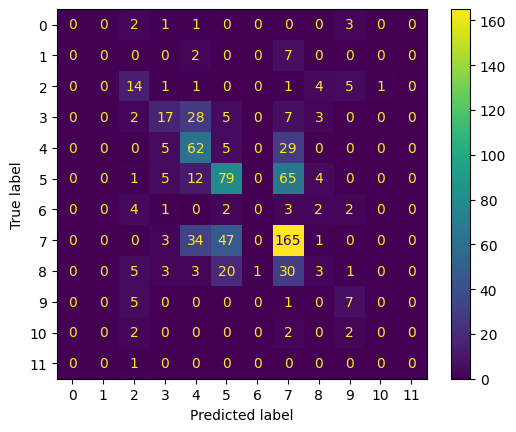

              precision    recall  f1-score   support

           G       0.00      0.00      0.00         7
          NR       0.00      0.00      0.00         9
          PG       0.39      0.52      0.44        27
       PG-13       0.47      0.27      0.35        62
           R       0.43      0.61      0.51       101
       TV-14       0.50      0.48      0.49       166
        TV-G       0.00      0.00      0.00        14
       TV-MA       0.53      0.66      0.59       250
       TV-PG       0.18      0.05      0.07        66
        TV-Y       0.35      0.54      0.42        13
       TV-Y7       0.00      0.00      0.00         6
    TV-Y7-FV       0.00      0.00      0.00         1

    accuracy                           0.48       722
   macro avg       0.24      0.26      0.24       722
weighted avg       0.44      0.48      0.45       722



C:\Users\Djafar\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Djafar\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Djafar\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

print(classification_report(y_test, predictions))